In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\luico\anaconda3\envs\pytensor2-0\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Performing a Basic Data Cleaning

In [8]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [24]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [37]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded)
df_encoded

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,0,0,1
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0,0,1
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1,0,0
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0,0,1


In [106]:
X_norm

array([[0.        , 0.        , 0.        , ..., 0.99941247, 0.55240461,
        0.73383732],
       [0.        , 1.        , 0.        , ..., 0.99924874, 0.78431242,
        0.73335999],
       [0.        , 1.        , 0.        , ..., 0.99935468, 0.25971247,
        0.74294718],
       ...,
       [0.        , 0.        , 0.        , ..., 0.998902  , 0.30429396,
        0.67174867],
       [0.        , 0.        , 1.        , ..., 0.998902  , 0.65442577,
        0.67257754],
       [0.        , 0.        , 1.        , ..., 0.99868047, 0.78453881,
        0.66907089]])

In [108]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_encoded.iloc[:,0:39]  #independent columns
y = df_encoded.iloc[:,41]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
X_norm = MinMaxScaler().fit_transform(X)
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X_norm,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                Specs       Score
1       koi_fpflag_ss  538.080588
2       koi_fpflag_co  476.015576
0       koi_fpflag_nt  336.322989
3       koi_fpflag_ec  300.375470
27   koi_tce_plnt_num   63.722416
11    koi_impact_err1   40.388107
4          koi_period   35.793618
16          koi_depth   33.919255
26      koi_model_snr   31.779238
5     koi_period_err1   23.055696
29     koi_steff_err1   18.613689
14  koi_duration_err1   15.159609
32     koi_slogg_err1   12.687893
8    koi_time0bk_err1   12.612483
37                 ra   12.058421


[0.05834814 0.09565784 0.0751829  0.02544526 0.02479794 0.0206944
 0.02065695 0.01975545 0.03777803 0.03954355 0.01742315 0.01737299
 0.01417557 0.02657422 0.04300171 0.03815854 0.02567515 0.01925024
 0.02080797 0.01816369 0.01462932 0.01460604 0.01700138 0.01242214
 0.01237768 0.01179904 0.03847783 0.01659396 0.01547088 0.03349455
 0.02544539 0.01573681 0.01674469 0.02148205 0.01341667 0.01697566
 0.01304006 0.01687043 0.01495172]


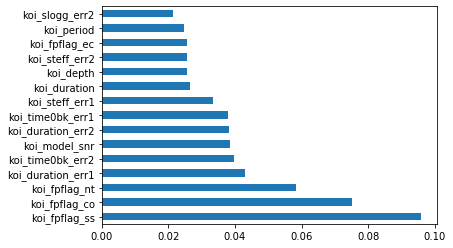

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [20]:
!pip install seaborn

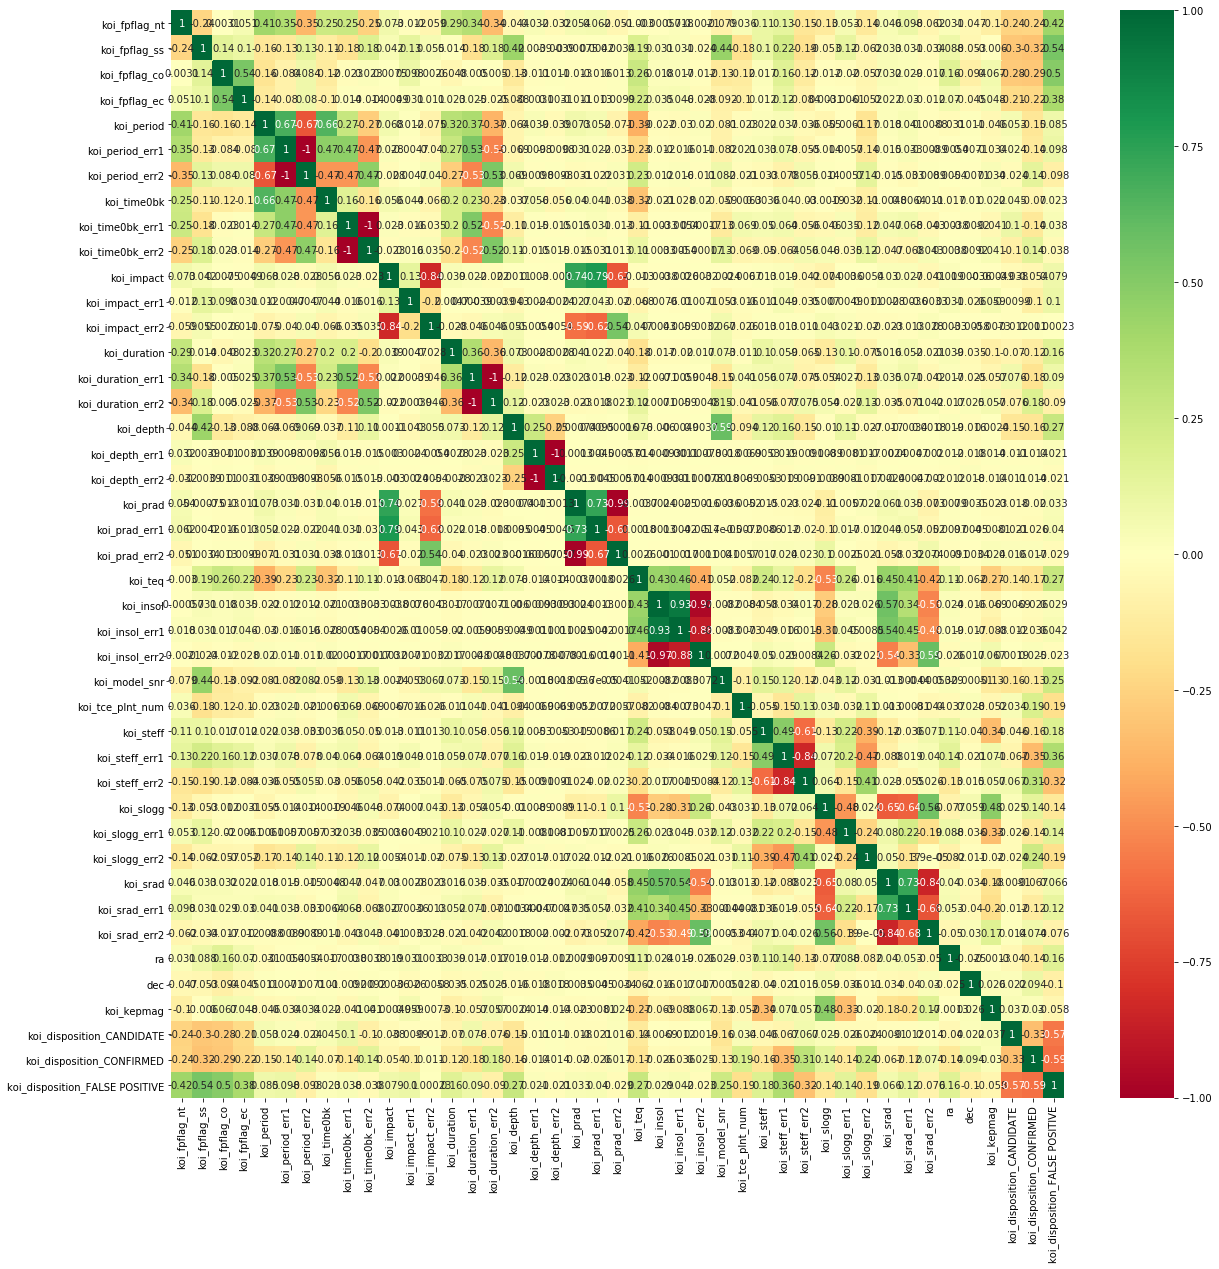

In [41]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_encoded.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [77]:
num_feats = 39
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')
cor_feature

39 selected features


['koi_impact_err2',
 'koi_depth_err2',
 'koi_depth_err1',
 'koi_prad_err2',
 'koi_prad',
 'koi_insol_err2',
 'koi_prad_err1',
 'koi_insol',
 'koi_insol_err1',
 'koi_impact',
 'koi_srad',
 'koi_time0bk',
 'koi_srad_err2',
 'dec',
 'koi_impact_err1',
 'koi_duration',
 'koi_srad_err1',
 'koi_model_snr',
 'koi_period_err2',
 'koi_period_err1',
 'koi_slogg_err1',
 'koi_slogg',
 'koi_time0bk_err2',
 'koi_time0bk_err1',
 'ra',
 'koi_period',
 'koi_steff',
 'koi_depth',
 'koi_teq',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_tce_plnt_num',
 'koi_fpflag_ec',
 'koi_fpflag_nt',
 'koi_slogg_err2',
 'koi_fpflag_co',
 'koi_steff_err2',
 'koi_fpflag_ss',
 'koi_steff_err1']

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

39 selected features


In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

39 selected features


C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='saga'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

28 selected features


C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

14 selected features


In [89]:
feature_name = df_encoded.iloc[:,0:39].columns
feature_name

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec'],
      dtype='object')

In [93]:
# feature_name = df_encoded.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,koi_steff_err1,True,True,True,True,True,True,6
2,koi_duration_err1,True,True,True,True,True,True,6
3,koi_duration,True,True,True,True,True,True,6
4,ra,True,True,True,True,False,True,5
5,koi_time0bk_err2,True,True,True,True,True,False,5
6,koi_time0bk_err1,True,True,True,True,True,False,5
7,koi_steff_err2,True,True,True,True,True,False,5
8,koi_steff,True,True,True,True,False,True,5
9,koi_srad_err1,True,True,True,True,False,True,5
10,koi_slogg,True,True,True,True,False,True,5


In [55]:
!pip install lightgbm

In [92]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

20 selected features


In [103]:
selected_features_from_analysis = feature_selection_df["Feature"].iloc[:19].tolist()
selected_features_from_analysis

['koi_steff_err1',
 'koi_duration_err1',
 'koi_duration',
 'ra',
 'koi_time0bk_err2',
 'koi_time0bk_err1',
 'koi_steff_err2',
 'koi_steff',
 'koi_srad_err1',
 'koi_slogg',
 'koi_prad_err2',
 'koi_prad_err1',
 'koi_prad',
 'koi_period_err2',
 'koi_period',
 'koi_model_snr',
 'koi_impact_err2',
 'koi_impact_err1',
 'koi_impact']

# Select your features (columns)

In [104]:
# Set features. This will also be used as your x values.
selected_features = df[selected_features_from_analysis]
selected_features.head()

,koi_steff_err1,koi_duration_err1,koi_duration,ra,koi_time0bk_err2,koi_time0bk_err1,koi_steff_err2,koi_steff,koi_srad_err1,koi_slogg,koi_prad_err2,koi_prad_err1,koi_prad,koi_period_err2,koi_period,koi_model_snr,koi_impact_err2,koi_impact_err1,koi_impact
0,81,0.11600,4.50700,291.93423,-0.003520,0.003520,-81,5455,0.105,4.467,-0.19,0.32,2.83,-2.479000e-04,54.418383,25.8,-0.443,0.059,0.586
1,158,0.03410,1.78220,297.00482,-0.000581,0.000581,-176,5853,0.233,4.544,-1.31,3.92,14.60,-1.490000e-05,19.899140,76.3,-0.077,5.126,0.969
2,157,0.00537,2.40641,285.53461,-0.000115,0.000115,-174,5805,0.201,4.564,-2.83,8.50,33.46,-2.630000e-07,1.736952,505.6,-0.092,0.115,1.276
3,169,0.04200,1.65450,288.75488,-0.001130,0.001130,-211,6031,0.334,4.438,-0.35,0.88,2.75,-3.760000e-06,2.525592,40.9,-0.478,0.235,0.701
4,189,0.06730,3.14020,296.28613,-0.001900,0.001900,-232,6046,0.315,4.486,-0.30,0.90,2.77,-1.050000e-05,4.134435,40.2,-0.532,0.139,0.762


# Create a Train Test Split

Use `koi_disposition` for the y values

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)